Plot Example Map for each Rearing Condition

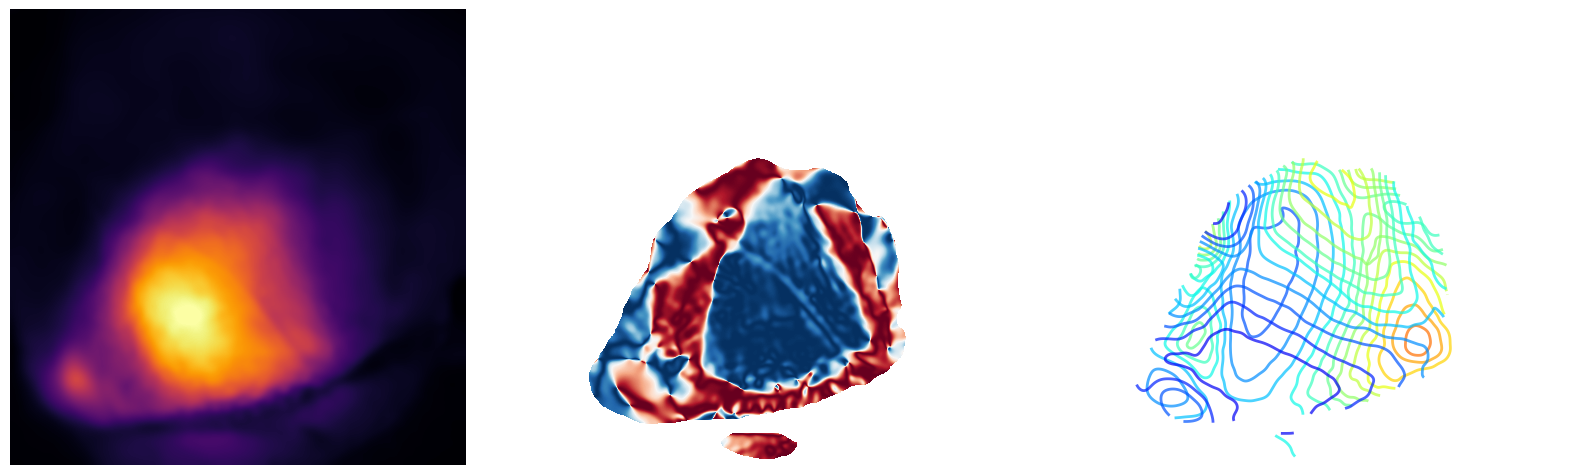

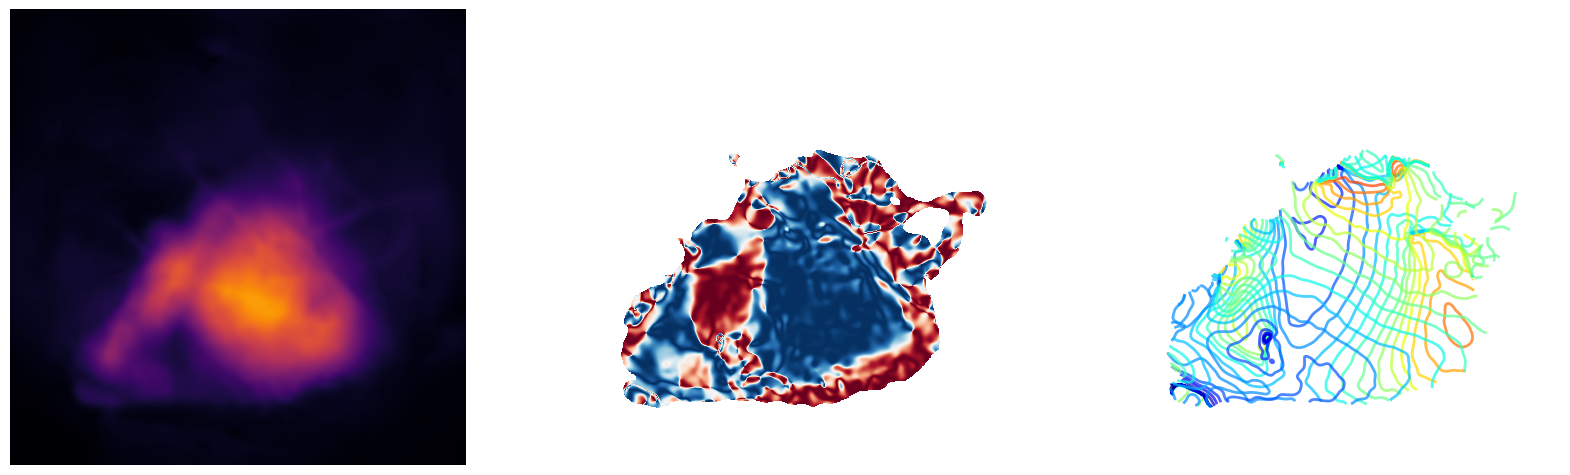

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FormatStrFormatter
from tifffile import imread

exp_path = "/Users/ryan.gorzek/Documents/Trachtenberg Lab/Data/Mapping_Through_Skull/"
examples = ["ctb03/20220623_161247/", 
            "lt170/20220421_133932/"]
%matplotlib inline
for ex in examples:
    ref_frame = imread(exp_path + ex + "refframe.tif").squeeze()
    signmap = np.loadtxt(exp_path + ex + "signmap.csv")
    azimuth = np.loadtxt(exp_path + ex + "azimuth.csv")
    elevation = np.loadtxt(exp_path + ex + "elevation.csv")
    avg_mag = np.loadtxt(exp_path + ex + "avg_mag.csv")*100
    
    signmap[avg_mag < np.percentile(avg_mag, 70)] = np.nan
    azimuth[avg_mag < np.percentile(avg_mag, 70)] = np.nan
    elevation[avg_mag < np.percentile(avg_mag, 70)] = np.nan
    
    fig, axs = plt.subplots(1, 3)
    # ax.imshow(ref_frame, cmap="gray")
    axs[0].imshow(avg_mag, cmap="inferno", alpha=1, clim=[0, 5])
    axs[0].axis("off")
    axs[1].imshow(signmap, cmap="RdBu_r", alpha=1, clim=[-1, 1])
    axs[1].axis("off")
    axs[2].imshow(np.full((512, 512), np.nan), cmap="gray")
    axs[2].contour(azimuth, levels=np.arange(0, 144, 7.5), cmap='jet_r', alpha=0.7, linewidths=2)
    axs[2].contour(elevation, levels=np.arange(0, 100, 5), cmap='jet_r', alpha=0.7, linewidths=2)
    axs[2].axis("off")
    fig.set_size_inches(20, 8)
    
    # cax = inset_axes(axs[0], width='5%', height='90%', loc='center left', borderpad=-5)
    # colorbar = fig.colorbar(axs[0].images[1], cax=cax)
    # colorbar.set_label('Pearson Correlation Coefficient', color='k', fontsize=20)
    # cax.yaxis.tick_left()
    # cax.yaxis.set_label_position('left')
    # cax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # cax.tick_params(labelsize=15)